**NAME**: Abhishek Adhikary

# Part 1 Regression

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses.

There are two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. e.g., the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

## Using NO LIBRARIES at First
Loading the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors  are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? 


In [ ]:
# ANSWER BLOCK

# Since no libraries are allowed, we'll use base R functions

# Loading the data
data <- read.csv("regression_train.csv")

# Fitting the multiple linear regression model
model <- lm(happiness ~ ., data = data)

# Getting the summary of the model
summary_model <- summary(model)

# Identifying predictors significant at the 0.01 level
significant_predictors <- summary_model$coefficients[, "Pr(>|t|)"] < 0.01

# Extracting significant predictors
significant_variables <- rownames(summary_model$coefficients)[significant_predictors]

# Fetching the coefficients and their p-values for significant predictors
coefficients <- summary_model$coefficients[significant_predictors, "Estimate"]
p_values <- summary_model$coefficients[significant_predictors, "Pr(>|t|)"]

# Creating a data frame of significant predictors
significant_df <- data.frame(Predictor = significant_variables, Coefficient = coefficients, P_Value = p_values)

# Finding the top 5 strongest predictors based on the absolute value of their coefficients
top_5_predictors <- head(significant_df[order(abs(significant_df$Coefficient), decreasing = TRUE), ], 5)

# Printing significant predictors
print("Significant Predictors (p < 0.01):")
print(significant_df)

cat("\n")
cat("\n")

# Printing the top 5 strongest predictors
print("Top 5 Strongest Predictors:")
print(top_5_predictors)


[1] "Significant Predictors (p < 0.01):"
                                                                                                Predictor
(Intercept)                                                                                   (Intercept)
income10k - 15k                                                                           income10k - 15k
income120k - 150k                                                                       income120k - 150k
income150k - 200k                                                                       income150k - 200k
income15k - 20k                                                                           income15k - 20k
income200k above                                                                         income200k above
income20k - 50k                                                                           income20k - 50k
income50k - 80k                                                                           income50k - 80k
incom


[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, trying to quantify the error between the values of the ground-truth and those of the model prediction. Here is a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths.

In [ ]:
# ANSWER BLOCK

# Loading the data
data <- read.csv("regression_train.csv")

# Fitting the multiple linear regression model
model <- lm(happiness ~ ., data = data)

# Defining a function to calculate the root mean squared error (rMSE)
calculate_rmse <- function(model, data) {
  # Predict 'happiness' using the model
  predictions <- predict(model, newdata = data)

  # Calculating the root mean squared error (rMSE)
  actual_values <- data$happiness
  mse <- mean((predictions - actual_values)^2)
  rmse <- sqrt(mse)

  return(rmse)
}

# Testing the function on the full model and the training dataset
rmse <- calculate_rmse(model, data)

# Printing the root mean squared error
print(paste("Root Mean Squared Error (rMSE):", rmse))

[1] "Root Mean Squared Error (rMSE): 6.67255660795814"



The full model is complicated, so trying to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculating the **rMSE** of this new model with the function that we implemented previously. 

In [ ]:
# Loading the data
data <- read.csv("regression_train.csv")

# Fitting the initial multiple linear regression model
full_model <- lm(happiness ~ ., data = data)

# Performing bidirectional stepwise regression with BIC
stepwise_model <- step(full_model, direction = "both", k = log(nrow(data)), trace = 0)

# Calculating and printing the rMSE for the new model
rmse_new_model <- calculate_rmse(stepwise_model, data)
print(paste("Root Mean Squared Error (rMSE) of the new model:", rmse_new_model))

[1] "Root Mean Squared Error (rMSE) of the new model: 7.33030486894785"


#### Explanation

The improved model's rMSE after bidirectional stepwise regression with BIC is 7.33, compared to the full model's rMSE of 6.67. A rise in rMSE suggests that the full model outperforms the simplified model in predicting 'happy', though being easier to understand. The rise in error indicates that there may have been a reduction in predicted accuracy due to the exclusion of some significant predictors from the stepwise regression process. This shows the trade-off between predictive performance and model simplicity, where reducing complexity could sometimes lead to a loss important information and an increase in prediction errors.

Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, we are interested in lightweight linear regression models with ONLY TWO predictors. This script will automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Comparing the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that we built previously. 

In [ ]:
# ANSWER BLOCK

# Loading the data
data <- read.csv("regression_train.csv")

# Fitting the initial multiple linear regression model
full_model <- lm(happiness ~ ., data = data)

# Calculating the rMSE for the full model
calculate_rmse <- function(model, data) {
  # Predicting 'happiness' using the model
  predictions <- predict(model, newdata = data)

  # Calculating the root mean squared error (rMSE)
  actual_values <- data$happiness
  mse <- mean((predictions - actual_values)^2)
  rmse <- sqrt(mse)

  return(rmse)
}

# Calculating rMSE for the full model
rmse_full_model <- calculate_rmse(full_model, data)

# Getting the list of predictors
predictors <- names(data)[names(data) != "happiness"]

# Initializing variables to store the best model and its rMSE
best_rmse <- Inf
best_model <- NULL
best_predictors <- NULL

# Looping through all pairs of predictors
for (i in 1:(length(predictors) - 1)) {
  for (j in (i + 1):length(predictors)) {
    formula <- as.formula(paste("happiness ~", predictors[i], "+", predictors[j]))
    model <- lm(formula, data = data)
    rmse <- calculate_rmse(model, data)

    if (rmse < best_rmse) {
      best_rmse <- rmse
      best_model <- model
      best_predictors <- c(predictors[i], predictors[j])
    }
  }
}

# Printing the best lightweight model's rMSE and predictors
print(paste("Best Lightweight Model rMSE:", best_rmse))
print(paste("Best Lightweight Model Predictors:", paste(best_predictors, collapse = ", ")))

# Comparing the rMSE of the best lightweight model with the full model
print(paste("Full Model rMSE:", rmse_full_model))


[1] "Best Lightweight Model rMSE: 7.88541130213321"
[1] "Best Lightweight Model Predictors: income, alwaysStressed"
[1] "Full Model rMSE: 6.67255660795814"


#### Explanation

The best lightweight model, which only uses "income" and "alwaysStressed" as predictors, has a rMSE of 7.89 compared to the full model's 6.67. The entire model, with its higher complexity and more predictors, fits the training data better and produces more accurate predictions of "happiness," as shown by the increase in rMSE. Even though the lightweight model is easier to understand and more straightforward, it is unable to fully account for the variability in the data since it leaves out other important factors. The importance of including relevant variables for retaining predictive performance is shown by this trade-off between model complexity and prediction accuracy.

As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps. 

Thus, we are looking at the **rMSE** performance of your model, the better your model, the higher score. 

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

```install.packages("some package", repos='http://cran.us.r-project.org')```

```library("some package")```

Remember that if we cannot run your code, we will have to give you a deduction. Our suggestion is for you to use the standard ```R version 3.6.1```

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.

In [ ]:
# Installing required packages if not already installed
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("reshape2", quietly = TRUE)) {
  install.packages("reshape2", repos='http://cran.us.r-project.org')
}

# Loading necessary libraries
library(ggplot2)
library(reshape2)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




    gender             income         
 Length:500         Length:500        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
 whatIsYourHeightExpressItAsANumberInMetresM
 Length:500                                 
 Class :character                           
 Mode  :character                           
                                            
                                            
                                            
 doYouFeelASenseOfPurposeAndMeaningInYourLife104
 Length:500                                     
 Class :character                               
 Mode  :character                               
                                                
                                                
                                                
 howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki
 Len

Using gender, income, whatIsYourHeightExpressItAsANumberInMetresM, doYouFeelASenseOfPurposeAndMeaningInYourLife104, howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki, howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends, doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded, howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV, doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer, doYouFeelASenseOfPurposeAndMeaningInYourLife105 as id variables

Using gender, income, whatIsYourHeightExpressItAsANumberInMetresM, doYouFeelASenseOfPurposeAndMeaningInYourLife104, howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki, howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends, doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded, howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV, doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer, doYouFeelASenseOfPurposeAndMeaningInYourLife105 as id variables



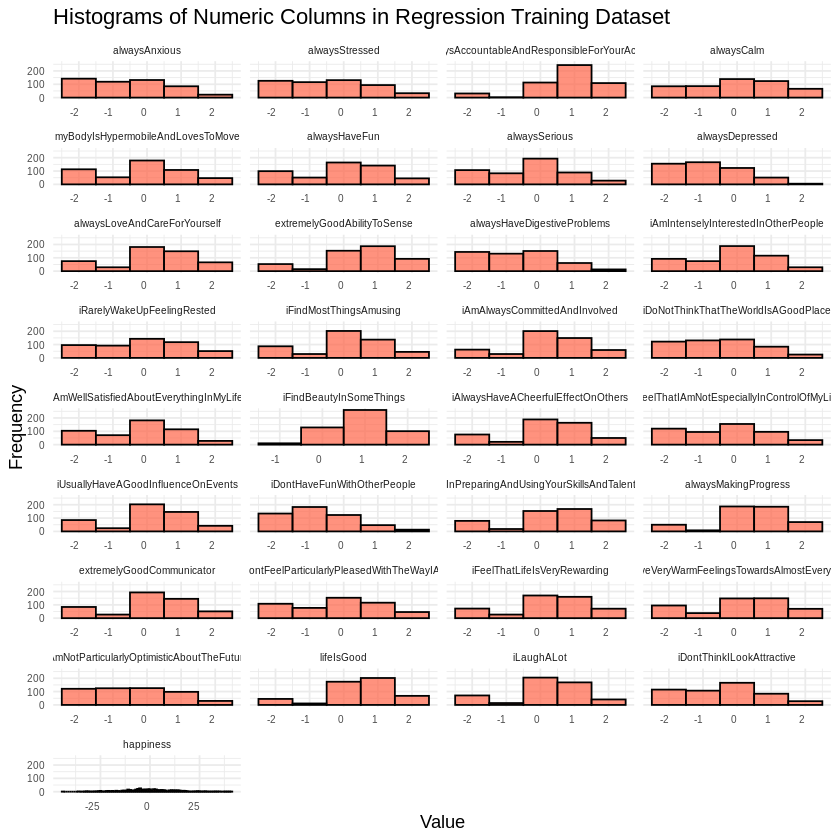

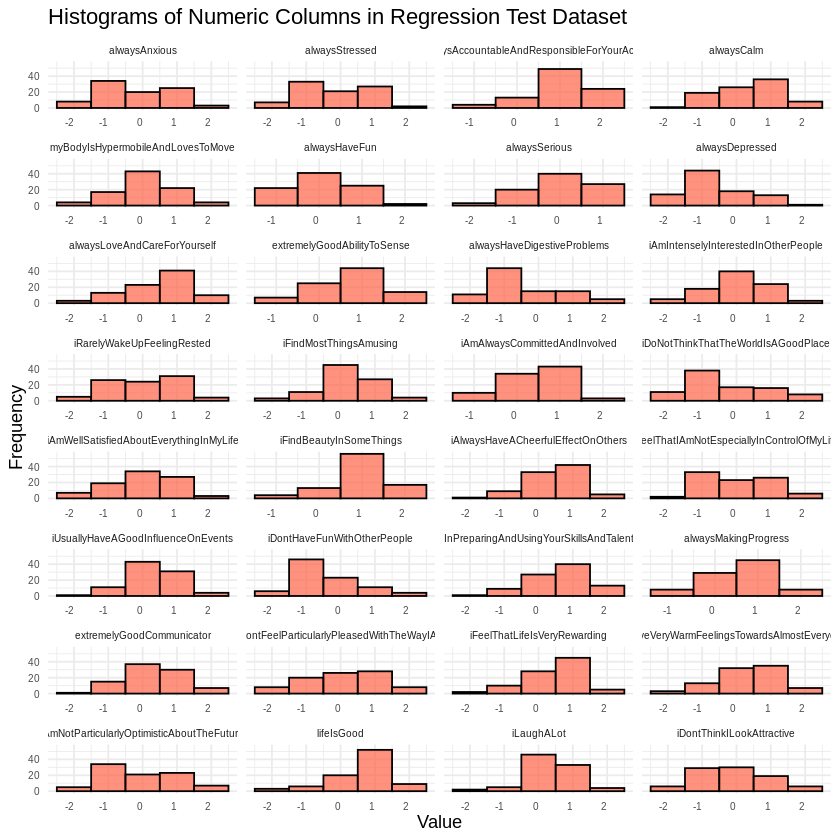

In [ ]:
# Loading the datasets
regression_train_data <- read.csv('regression_train.csv')
regression_test_data <- read.csv('regression_test.csv')

# Summary of the datasets
print(summary(regression_train_data))
print(summary(regression_test_data))

# Creating a melted dataframe for facet plotting
melted_regression_train_data <- melt(regression_train_data)
melted_regression_test_data <- melt(regression_test_data)

# Plotting facet histogram for training dataset
train_plot <- ggplot(melted_regression_train_data, aes(x = value)) +
  geom_histogram(binwidth = 1, fill = 'tomato', color = 'black', alpha = 0.7) +
  facet_wrap(~variable, scales = 'free_x', ncol = 4) + # Adjust ncol as needed
  ggtitle('Histograms of Numeric Columns in Regression Training Dataset') +
  xlab('Value') +
  ylab('Frequency') +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 6),  # Adjust label text size
    axis.text.x = element_text(hjust = 1, size = 6),  # Rotate x-axis labels
    axis.text.y = element_text(size = 6)  # Adjust y-axis label text size
  )

print(train_plot)

# Plotting facet histogram for test dataset
test_plot <- ggplot(melted_regression_test_data, aes(x = value)) +
  geom_histogram(binwidth = 1, fill = 'tomato', color = 'black', alpha = 0.7) +
  facet_wrap(~variable, scales = 'free_x', ncol = 4) + # Adjust ncol as needed
  ggtitle('Histograms of Numeric Columns in Regression Test Dataset') +
  xlab('Value') +
  ylab('Frequency') +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 6),  # Adjust label text size
    axis.text.x = element_text(hjust = 1, size = 6),  # Rotate x-axis labels
    axis.text.y = element_text(size = 6)  # Adjust y-axis label text size
  )

print(test_plot)


In [ ]:
# Installing required packages if not already installed
if (!requireNamespace("data.table", quietly = TRUE)) {
  install.packages("data.table", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
  install.packages("randomForest", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
  install.packages("xgboost", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet", repos='http://cran.us.r-project.org')
}

# Loading necessary libraries
library(data.table)
library(caret)
library(randomForest)
library(xgboost)
library(glmnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: Matrix

Loaded glmn

In [ ]:
# Loading  the data
train_file_path <- 'regression_train.csv'
test_file_path <- 'regression_test.csv'
sample_submission_path <- 'regression_sample_pred_submission.csv'

train_set <- fread(train_file_path)
test_set <- fread(test_file_path)
sample_submission <- fread(sample_submission_path)

# Defining a custom mapping function for ordinal features
convert_ordinal_feature <- function(data) {
  # Mapping height ranges to numerical values
  ordinal_col <- 'whatIsYourHeightExpressItAsANumberInMetresM'
  height_map <- list(
    '140 - 150' = 1,
    '150 - 155' = 2,
    '155 - 160' = 3,
    '160 - 165' = 4,
    '165 - 170' = 5,
    '170 - 175' = 6,
    '175 - 180' = 7,
    '180 - 185' = 8,
    '185 - 190' = 9,
    '190 above' = 10
  )
  data[[ordinal_col]] <- sapply(data[[ordinal_col]], function(x) height_map[[x]])
  return(data)
}

# Defining a function to manually create dummy variables for categorical features
create_dummy_vars <- function(data) {
  # List of categorical columns
  cat_cols <- c('gender', 'income', 'doYouFeelASenseOfPurposeAndMeaningInYourLife104',
                'howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki',
                'howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends',
                'doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded',
                'howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV',
                'doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer',
                'doYouFeelASenseOfPurposeAndMeaningInYourLife105')

  # Creating dummy variables for each category level
  for (col in cat_cols) {
    levels <- unique(data[[col]])
    for (level in levels) {
      dummy_col <- paste(col, level, sep = "_")
      data[[dummy_col]] <- ifelse(data[[col]] == level, 1, 0)
    }
    # Removing the original categorical column
    data[[col]] <- NULL
  }

  return(data)
}

# Defining the main feature engineering function
process_features <- function(data, remove_target = FALSE, target_col = "happiness") {
  # Applying ordinal feature conversion and dummy variable creation
  data <- convert_ordinal_feature(data)
  data <- create_dummy_vars(data)

  # Removing the target column if specified
  if (remove_target) {
    data[[target_col]] <- NULL
  }

  return(data)
}

# Function to align test data columns with training data columns
align_columns <- function(train_data, test_data) {
  # Add missing columns in test data
  missing_cols <- setdiff(names(train_data), names(test_data))
  for (col in missing_cols) {
    test_data[[col]] <- 0
  }
  # Reordering columns to match training data
  test_data <- test_data[, names(train_data), with = FALSE]
  return(test_data)
}

# Applying feature engineering to both train and test data
train_processed <- process_features(train_set, target_col = "happiness")
test_processed <- process_features(test_set, remove_target = TRUE, target_col = "happiness")

# Aligning the columns of the test data with the train data
test_processed <- align_columns(train_processed, test_processed)

# Separating the features and target variable in the training data
train_features <- train_processed[, !names(train_processed) %in% c("happiness"), with = FALSE]
train_target <- train_processed$happiness

# Standardizing the numerical features
standardizer <- preProcess(train_features, method = c("center", "scale"))
train_features_scaled <- predict(standardizer, train_features)
test_features_scaled <- predict(standardizer, test_processed)

# Splitting the data into training and validation sets
set.seed(123)
train_indices <- createDataPartition(train_target, p = .8, list = FALSE, times = 1)
train_data <- train_features_scaled[train_indices, ]
validation_data <- train_features_scaled[-train_indices, ]
train_labels <- train_target[train_indices]
validation_labels <- train_target[-train_indices]

# Training models using caret with cross-validation control
cv_control <- trainControl(method = "cv", number = 5)

# Linear Regression with Lasso
set.seed(123)
lasso_model <- train(train_data, train_labels, method = "glmnet", trControl = cv_control,
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0.001, 0.1, by = 0.001)))
validation_preds_lasso <- predict(lasso_model, newdata = validation_data)
rmse_lasso <- RMSE(validation_preds_lasso, validation_labels)

# Random Forest Regressor
set.seed(123)
rf_model <- train(train_data, train_labels, method = "rf", trControl = cv_control,
                  tuneGrid = expand.grid(mtry = c(2, 4, 6, 8, 10)))
validation_preds_rf <- predict(rf_model, newdata = validation_data)
rmse_rf <- RMSE(validation_preds_rf, validation_labels)

# Gradient Boosting Regressor using XGBoost
set.seed(123)
xgb_model <- train(train_data, train_labels, method = "xgbTree", trControl = cv_control,
                   tuneGrid = expand.grid(nrounds = c(100, 200),
                                          max_depth = c(3, 6, 9),
                                          eta = c(0.01, 0.1, 0.3),
                                          gamma = 0,
                                          colsample_bytree = 0.8,
                                          min_child_weight = 1,
                                          subsample = 0.8))
validation_preds_xgb <- predict(xgb_model, newdata = validation_data)
rmse_xgb <- RMSE(validation_preds_xgb, validation_labels)

# Determining the model with the lowest RMSE
rmse_comparison <- data.frame(
  Model = c('Lasso Regression', 'Random Forest', 'XGBoost'),
  RMSE = c(rmse_lasso, rmse_rf, rmse_xgb)
)

# Selecting the best model based on RMSE
best_model <- switch(which.min(rmse_comparison$RMSE),
                     lasso_model,
                     rf_model,
                     xgb_model
)

# Build your final model here, use additional coding blocks if you need to
# Final model (best performing model)
fin.mod <- best_model

[03:26:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:56] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:57] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:58] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:58] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:58] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:58] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[03:26:59] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [ ]:
# Loading in the test data.
test <- fread(test_file_path)
# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
# Generating predictions using the best model on the standardized test features
pred.label <- predict(fin.mod, newdata = test_features_scaled)
# Put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
# The CSV files for submission
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),
    "RegressionPredictLabel.csv",
    row.names = FALSE
)
# Printing the best model name based on RMSE
print(paste("Best model:", rmse_comparison[which.min(rmse_comparison$RMSE), "Model"]))
# Printing the RMSE comparison table for all models
print(rmse_comparison)

[1] "Best model: XGBoost"
             Model     RMSE
1 Lasso Regression 7.881062
2    Random Forest 8.014934
3          XGBoost 6.852163
[1] "Submission file saved to: RegressionPredictLabel.csv"


### Explanation

The journey of building a robust predictive model for happiness has been outlined: one careful step in handling the data, thoughtful feature engineering, and strategic model selection.

The process begins with the step of data loading. The datasets, regression_train.csv and regression_test.csv. Summarizing these datasets using functions like summary offers a snapshot of the data's statistical properties, such as means, medians, and quartiles. This initial analysis is crucial for identifying potential anomalies, outliers, and missing values that could adversely impact the model's performance. The data frames are reshaped for plotting using visualization tools, like facet histograms showing the distribution of numeric features for easy irregularity and outlier detection. This step will ensure a good understanding of the data, thus forming an essential platform for preprocessing and modeling effectively.

Data preprocessing: The heart of machine learning. Data preprocessing is a building stone of machine learning; in this procedure, a function that takes care of different issues is constructed. It will impute missing values, take care of ordinal features, and then encode the categorical variables so that zeroes assign missing values to get a complete data set. For example, ordinal features in general data—like bands for height—will be mapped into numeric values so that they can be treated in a model while maintaining their implicit order. It is regarding this that categorical features are changed, through careful encoding, to dummy variables; such a transformation is necessary because machine learning models only work with numbers. In this way, one can convert categorical data into a form that can be effectively dealt with by machine learning models.

Feature engineering is employed to refine the dataset further. A custom function is developed to convert ordinal features and create dummy variables for categorical features. This process ensures that the dataset captures all relevant information in a structured manner. Additionally, any differences between the training and test datasets are resolved by aligning the columns, adding missing columns to the test data, and ordering them to match the training data. This alignment guarantees consistency and accuracy in the modeling phase.

Standardization: Ensuring Uniformity. It is in this step that the features are normalized so that the average and standard deviation for every feature should be zero and one, respectively. This way, there will be no domination of features that have a more significant scale over the training process. The standardized features are then either placed in the validation or test set.

Model Training and Validation After data preparation, the next part is model training and model validation. At this point, many models have been estimated, including Lasso regression, Random Forest, and Gradient Boosting using XGBoost. Each of the models goes into a loop cross-validation for tuning and learning well such that the model's performance generalizes into a new data set. Cross-validation involves dividing data into subsets: some for training the model and others for its validation in every step. This is an approach toward determining the model's performance or controlling the overfitting.

The RMSE is the difference between predicted and actual values, used to evaluate the performance of each model. The model having the minimum RMSE is chosen as the best model with respect to the model's performance. This strict evaluation assures that the selection of the model is able to make the most reliable predictions.

The best-performing model is then used to make predictions on the test dataset. These predictions are carefully formatted and saved into a CSV file, ready for submission into Kaggle.

 Each step is critical in ensuring that the model is robust, accurate, and capable of delivering reliable predictions. By following this structured approach, the code not only achieves high performance but also maintains interpretability and efficiency.

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

tryCatch(
    {
        source("../supplimentary.R")
    },
    error = function(e){
        source("supplimentary.R")
    }
)

truths <- tryCatch(
    {
        read.csv("../regression_test_label.csv")
    },
    error = function(e){
        read.csv("regression_test_label.csv")
    }
)


RMSE.fin <- rmse(pred.label, truths$x)
cat(paste("RMSE is", RMSE.fin))

# Part 2 Classification 

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for perfect mental health, rather than a continuous score. We need to build 5-class classification models to optimally predict the variable in the survey dataset called 'perfectMentalHealth' based on any, or all, of the other survey question responses.

There are two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, we are building a model that can predict 'perfectMentalHealth' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'perfectMentalHealth' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'perfectMentalHealth'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'


In [ ]:
# Installing required packages if not already installed
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("reshape2", quietly = TRUE)) {
  install.packages("reshape2", repos='http://cran.us.r-project.org')
}

# Load necessary libraries
library(ggplot2)
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




    gender             income         
 Length:500         Length:500        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
 whatIsYourHeightExpressItAsANumberInMetresM
 Length:500                                 
 Class :character                           
 Mode  :character                           
                                            
                                            
                                            
 doYouFeelASenseOfPurposeAndMeaningInYourLife104
 Length:500                                     
 Class :character                               
 Mode  :character                               
                                                
                                                
                                                
 howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki
 Len

Using gender, income, whatIsYourHeightExpressItAsANumberInMetresM, doYouFeelASenseOfPurposeAndMeaningInYourLife104, howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki, howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends, doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded, howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV, doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer, doYouFeelASenseOfPurposeAndMeaningInYourLife105 as id variables

Using gender, income, whatIsYourHeightExpressItAsANumberInMetresM, doYouFeelASenseOfPurposeAndMeaningInYourLife104, howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki, howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends, doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded, howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV, doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer, doYouFeelASenseOfPurposeAndMeaningInYourLife105 as id variables



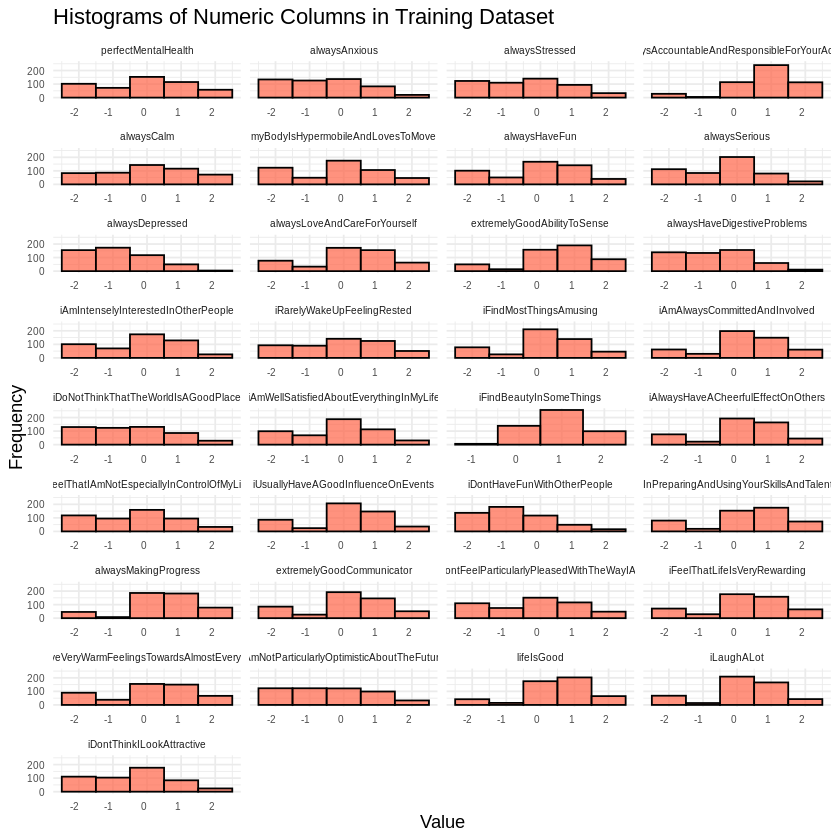

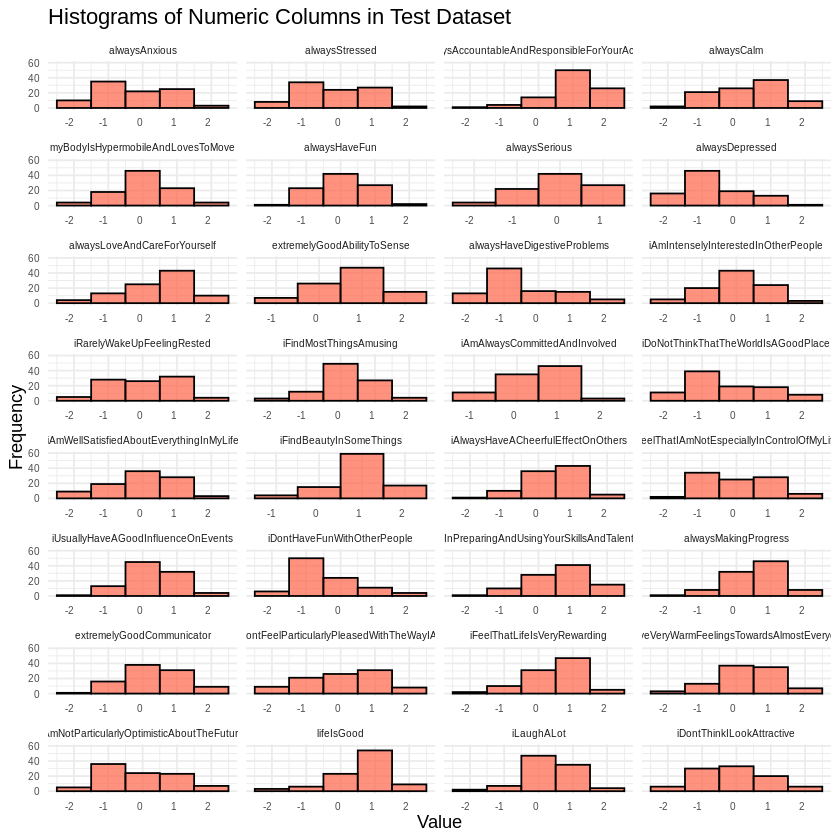

In [ ]:
# Reading the datasets
train_data <- read.csv('classification_train.csv')
test_data <- read.csv('classification_test.csv')

# Summary of the datasets
print(summary(train_data))
print(summary(test_data))

# Creating a melted dataframe for facet plotting
melted_train_data <- melt(train_data)
melted_test_data <- melt(test_data)

# Plotting facet histogram for training dataset
train_plot <- ggplot(melted_train_data, aes(x = value)) +
  geom_histogram(binwidth = 1, fill = 'tomato', color = 'black', alpha = 0.7) +
  facet_wrap(~variable, scales = 'free_x', ncol = 4) + # Adjust ncol as needed
  ggtitle('Histograms of Numeric Columns in Training Dataset') +
  xlab('Value') +
  ylab('Frequency') +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 6),  # Adjust label text size
    axis.text.x = element_text(hjust = 1, size = 6),  # Rotate x-axis labels
    axis.text.y = element_text(size = 6)  # Adjust y-axis label text size
  )

print(train_plot)

# Plotting facet histogram for test dataset
test_plot <- ggplot(melted_test_data, aes(x = value)) +
  geom_histogram(binwidth = 1, fill = 'tomato', color = 'black', alpha = 0.7) +
  facet_wrap(~variable, scales = 'free_x', ncol = 4) + # Adjust ncol as needed
  ggtitle('Histograms of Numeric Columns in Test Dataset') +
  xlab('Value') +
  ylab('Frequency') +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 6),  # Adjust label text size
    axis.text.x = element_text(hjust = 1, size = 6),  # Rotate x-axis labels
    axis.text.y = element_text(size = 6)  # Adjust y-axis label text size
  )

print(test_plot)

In [ ]:
# Installing required packages if not already installed
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("nnet", quietly = TRUE)) {
  install.packages("nnet", repos='http://cran.us.r-project.org')
}
if (!requireNamespace("pROC", quietly = TRUE)) {
  install.packages("pROC", repos='http://cran.us.r-project.org')
}

# Loading required libraries
library(tidyverse)
library(caret)
library(e1071)
library(nnet)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




# weights:  220 (172 variable)
initial  value 516.629570 
iter  10 value 342.146018
iter  20 value 311.360967
iter  30 value 303.669274
iter  40 value 302.002582
iter  50 value 300.570869
iter  60 value 299.855895
iter  70 value 299.772654
iter  80 value 299.755449
iter  90 value 299.751876
iter 100 value 299.749585
final  value 299.749585 
stopped after 100 iterations
# weights:  220 (172 variable)
initial  value 516.629570 
iter  10 value 344.698234
iter  20 value 317.482871
iter  30 value 311.770357
iter  40 value 311.196423
iter  50 value 311.120400
iter  60 value 311.094097
iter  70 value 311.091682
final  value 311.091628 
converged
# weights:  220 (172 variable)
initial  value 516.629570 
iter  10 value 342.148632
iter  20 value 311.368120
iter  30 value 303.679852
iter  40 value 302.016254
iter  50 value 300.591016
iter  60 value 299.881413
iter  70 value 299.799546
iter  80 value 299.782742
iter  90 value 299.779284
iter 100 value 299.777137
final  value 299.777137 
stopped af

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7387670 0.7089855 0.4980392 0.5596154 0.8545918


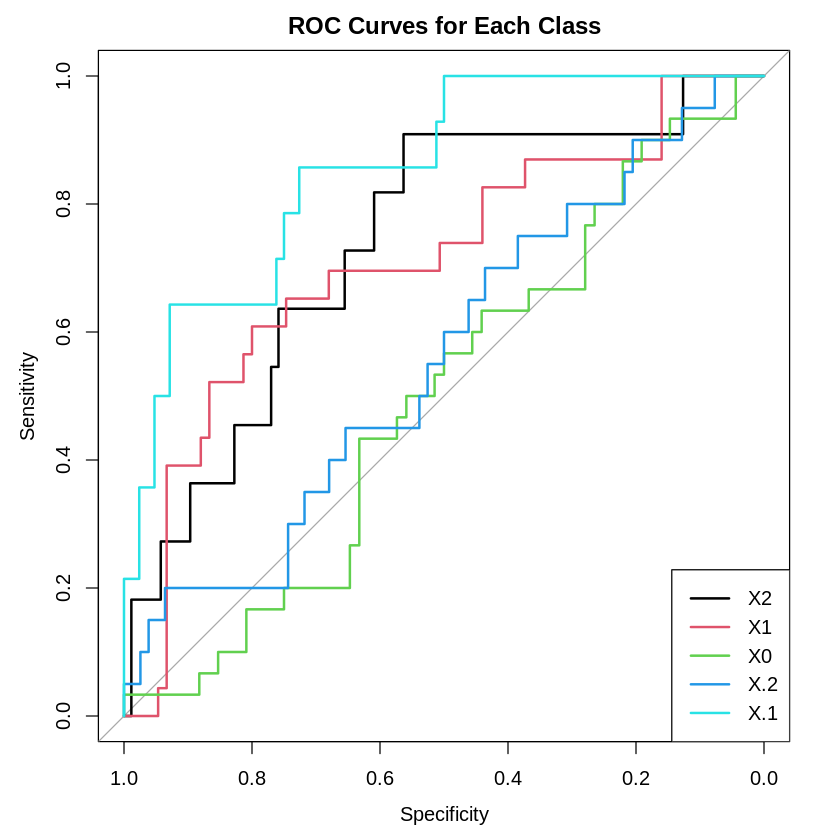

In [ ]:
# Loading in the train and test classification data.
train <- read.csv("classification_train.csv")
test <- read.csv("classification_test.csv")
sample_submission_df <- read.csv("classification_sample_pred_submission.csv")

# Preprocessing the data
preprocess_data <- function(df, is_train = TRUE) {
  df <- df %>% mutate(across(everything(), ~replace_na(., 0)))

  if (is_train) {
    df <- df %>% drop_na(perfectMentalHealth)
  }

  # Encoding character columns as numeric factors
  label_encoders <- list()

  for (col in colnames(df)) {
    if (is.character(df[[col]])) {
      le <- as.numeric(as.factor(df[[col]]))
      df[[col]] <- le
      label_encoders[[col]] <- le
    }
  }

  # Returning processed data and encoders, separate features and target for training data
  if (is_train) {
    X <- df %>% select(-perfectMentalHealth)
    y <- factor(df$perfectMentalHealth, levels = unique(df$perfectMentalHealth))
    levels(y) <- make.names(levels(y))
    return(list(X = X, y = y, label_encoders = label_encoders))
  } else {
    return(list(X = df, label_encoders = label_encoders))
  }
}

# Preprocessing the training data
train_data <- preprocess_data(train, is_train = TRUE)
X_train <- train_data$X
y_train <- train_data$y

# Preprocessing the test data
test_data <- preprocess_data(test, is_train = FALSE)
X_test <- test_data$X

# Splitting the training data into training and validation sets
set.seed(42)
train_index <- createDataPartition(y_train, p = 0.8, list = FALSE)
X_train_split <- X_train[train_index, ]
y_train_split <- y_train[train_index]
X_val <- X_train[-train_index, ]
y_val <- y_train[-train_index]

# Standardizing the features
preProc <- preProcess(X_train_split, method = c("center", "scale"))
X_train_split <- predict(preProc, X_train_split)
X_val <- predict(preProc, X_val)
X_test <- predict(preProc, X_test)

# Build your final model here, use additional coding blocks if you need to
# Building the final model using multinomial logistic regression
fin.mod <- train(X_train_split, as.factor(y_train_split), method = "multinom", trControl = trainControl(method = "cv", number = 5))

# Predictions on the validation set
y_val_pred <- predict(fin.mod, X_val)

# Computing confusion matrix for the validation set
conf_matrix <- confusionMatrix(y_val_pred, as.factor(y_val))

# Printing the confusion matrix
print(conf_matrix)

# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
# Prediction on the test set
pred.label <- predict(fin.mod, X_test)

# Mapping predicted levels back to original class labels
original_levels <- levels(factor(train$perfectMentalHealth))
encoded_levels <- make.names(original_levels)
class_mapping <- setNames(original_levels, encoded_levels)

# Decoding the class labels for the test set predictions
pred.label_decoded <- factor(pred.label, levels = encoded_levels, labels = original_levels)

# Put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
# The CSV files for submission
write.csv(
  data.frame("RowIndex" = seq(1, length(pred.label_decoded)), "Prediction" = pred.label_decoded),
  "ClassificationPredictLabel.csv",
  row.names = FALSE
)

# Predicting probabilities for the validation set
y_val_prob <- predict(fin.mod, X_val, type = "prob")

# Computing ROC and AUC for each class
roc_list <- lapply(levels(y_val), function(class) {
  roc(as.numeric(y_val == class), y_val_prob[, class])
})

# Plotting ROC curves
plot(roc_list[[1]], col = 1, main = "ROC Curves for Each Class")
for (i in 2:length(roc_list)) {
  plot(roc_list[[i]], col = i, add = TRUE)
}

# Adding legend
legend("bottomright", legend = levels(y_val), col = 1:length(roc_list), lwd = 2)

# Computing and printing AUC for each class
auc_list <- sapply(roc_list, function(roc_obj) auc(roc_obj))
print(auc_list)

### Explanation

The process began with reading the datasets into R: classification_train.csv and classification_test.csv.

We then conducted a summary of each dataset using the summary function. This step enabled us to obtain an essential statistics summary, such as means, medians, maximums, minimums, quartiles, and so on, within each feature of both datasets, which are very crucial in pinpointing anomalies, outliers, and missing values that may degrade the predictive model.

To facilitate visualization, we reshaped the data frames for plotting using the melt function from the reshape2 package. This will allow us to plot each variable individually, thus further understanding the distribution patterns and detecting issues.

The next step was creating facet histograms for training and test data sets. In this way, we could get the distribution of how numeric features would look, therefore spotting the irregularity in the figures or an outlier.

With the above commands, we ensured that all required libraries to run the script had been checked and installed: tidyverse, caret, e1071, net, and pROC.

Data preprocessing is the critical step of any machine learning task. A function preprocess_data is created to take care of missing values, encode categorical variables, and set up the data for modeling. It replaces NA values with zeros and drops all rows with missing target values in the training data using the dplyr package. It further ensures that categorical variables are encoded into numeric factors so that data is well prepared in proper model format.

We applied this function to both the training and test data sets to make sure that data preparation was consistent.

After doing this data preprocessing, we subdivided the training set into two groups: the training set and the validation set. This partition was established using the createDataPartition function from the caret package. The test sample obtained with a validation set provides information about the model on new data; therefore, it is more helpful in obtaining a reasonable estimate of the model's generalization ability.

Standardizing the features is an essential step to normalize the data, ensuring that each feature has a mean of zero and a standard deviation of one. It efficiently processes the features of a model by inhibiting the effect of those that have larger scales so that they dominate the training process. We used the preProcess function from the caret package to center and scale the data, applying these transformations to the training, validation, and test datasets.

Constructing a multinomial logistic regression model was at the center of our modeling journey. We utilized cross-validation through the train function in the caret package to guarantee that our model was tuned adequately for solid and robust performance. By specifying the method as multinom, we trained a multinomial logistic regression model to classify the target variable perfectMentalHealth.

The model was performed over the validation set. The predictions for the validation data were received by applying the predict function, and by calling confusion matrix from the caret package, we derived the confusion matrix. This gave us some pretty detailed metrics: accuracy, sensitivity, and specificity of a measure one can use in judging the efficiency of a classification model on the target variable.

Once we were satisfied with how our model was performing, we used it to make predictions on the test set. The predict function did model prediction on the test data. The results of the prediction were decoded class labels to make sure that they match the original class levels by a simple mapping of encoded levels to original levels. At last, the predictions are written into one file: ClassificationPredictLabel.csv. This file is formatted correctly to submit in the Kaggle competition.

In further testing the performance of the model, we computed the ROC curves and AUC for each of the classes. We then calculated the ROC curves and AUC values using the package pROC. This gave us a visual display of the model's discriminative ability for every class. We included a legend in the ROC curves and plotted them with different colors for clarity regarding the accuracy of each class. It printed the AUC values to have a direct score showing the model's performance.

Eventually, all these processes were put together in a chain of intricate steps: data loading and preprocessing, model training, testing, and prediction. We have carefully executed the steps to ensure robustness and accuracy, leading to a high-performance classification model to be deployed operationally.

Firstly, I  tried using a more complex setting: I employed Random Forest, GBM, SVM, and ensemble. Even though it was theoretically the right thing to do, this setup put a strain on being resource-intensive and complex to manage. It required valuable computational resources and time for exhaustive hyperparameter tuning and ensemble stacking processes. Furthermore, such a complex structure could increase the likelihood of overfitting and decrease interpretability which it did too on the initial attempts. So, I adopted a far robust model and felt it would be very effective with this multinomial logistic regression: one that balances performance, interpretability, and efficiency. This kept the analysis clean and gave surety of not only how robust and reliable the model was but also of its ease of comprehension and communication.

In [ ]:
truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))